In [77]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import zipfile # Import the zipfile module
import os

zip_path = '/content/drive/MyDrive/Colab Notebooks/Boat dataset(Assignment).zip'
extract_path = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'
# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Now list files inside the extracted folder
print(os.listdir(extract_path))

['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']


In [79]:
import os
# Correcting the directory path based on previous outputs
data_dir = '/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train'
print(os.listdir(data_dir))

['ground_truth.txt', 'Thumbs.db', 'Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'Topa', 'VaporettoACTV', 'VigilidelFuoco', 'Water', 'gondola', 'motorboat', 'ferry', '20130412_043104_54559.jpg', '20130412_043117_54573.jpg', '20130412_043335_55056.jpg', '20130412_043430_55283.jpg', '20130412_043521_55307.jpg', '20130412_043628_55505.jpg', '20130412_043637_55509.jpg', '20130412_043722_55609.jpg', '20130412_043731_55595.jpg', '20130412_043904_55704.jpg', '20130412_044052_55916.jpg', '20130412_044229_56284.jpg', '20130412_044233_55969.jpg', '20130412_044234_56190.jpg', '20130412_044521_56626.jpg', '20130412_044824_56992.jpg', '20130412_044934_57058.jpg', '20130412_045201_57458.jpg', '20130412_045511_5

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

test_loader = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Boat dataset',
    target_size=(128, 128),
    batch_size=1,
    class_mode='categorical'
)


Found 6743 images belonging to 10 classes.


In [81]:
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/Boat dataset'))

['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']


In [82]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'


In [84]:
from PIL import Image
for folder in ['gondola', 'motorboat', 'ferry']:
    path = f'/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train'
    for file in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, file))
            img.verify()
        except Exception as e:
            print(f"Corrupt file: {file} in {folder}")

Corrupt file: ground_truth.txt in gondola
Corrupt file: Thumbs.db in gondola
Corrupt file: Alilaguna in gondola
Corrupt file: Ambulanza in gondola
Corrupt file: Barchino in gondola
Corrupt file: Cacciapesca in gondola
Corrupt file: Caorlina in gondola
Corrupt file: Gondola in gondola
Corrupt file: Lanciafino10m in gondola
Corrupt file: Lanciafino10mBianca in gondola
Corrupt file: Lanciafino10mMarrone in gondola
Corrupt file: Lanciamaggioredi10mBianca in gondola
Corrupt file: Lanciamaggioredi10mMarrone in gondola
Corrupt file: Motobarca in gondola
Corrupt file: Motopontonerettangolare in gondola
Corrupt file: MotoscafoACTV in gondola
Corrupt file: Mototopo in gondola
Corrupt file: Patanella in gondola
Corrupt file: Polizia in gondola
Corrupt file: Raccoltarifiuti in gondola
Corrupt file: Sandoloaremi in gondola
Corrupt file: Sanpierota in gondola
Corrupt file: Topa in gondola
Corrupt file: VaporettoACTV in gondola
Corrupt file: VigilidelFuoco in gondola
Corrupt file: Water in gondola
Co

In [85]:
import os
train_dir_path = '/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train'
if os.path.exists(train_dir_path):
    print(os.listdir(train_dir_path))
else:
    print(f"Directory not found: {train_dir_path}")

['ground_truth.txt', 'Thumbs.db', 'Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'Topa', 'VaporettoACTV', 'VigilidelFuoco', 'Water', 'gondola', 'motorboat', 'ferry', '20130412_043104_54559.jpg', '20130412_043117_54573.jpg', '20130412_043335_55056.jpg', '20130412_043430_55283.jpg', '20130412_043521_55307.jpg', '20130412_043628_55505.jpg', '20130412_043637_55509.jpg', '20130412_043722_55609.jpg', '20130412_043731_55595.jpg', '20130412_043904_55704.jpg', '20130412_044052_55916.jpg', '20130412_044229_56284.jpg', '20130412_044233_55969.jpg', '20130412_044234_56190.jpg', '20130412_044521_56626.jpg', '20130412_044824_56992.jpg', '20130412_044934_57058.jpg', '20130412_045201_57458.jpg', '20130412_045511_5

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

test_loader = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Boat dataset',
    target_size=(128, 128),
    batch_size=1,
    class_mode='categorical'
)


Found 6744 images belonging to 10 classes.


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


ValueError: The PyDataset has length 0

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation only for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Only rescale for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

validation_generator = val_test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/test",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/test",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 0 images belonging to 27 classes.
Found 4775 images belonging to 27 classes.
Found 4775 images belonging to 27 classes.


In [90]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

ValueError: The PyDataset has length 0

In [91]:
# Define the base paths for the training and validation data
train_base_path = '/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train'
validation_base_path = '/content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/test' # Assuming a validation folder exists

# Define the class names
class_names = ['gondola', 'motorboat', 'ferry']

# Create subdirectories in the training folder
for class_name in class_names:
    path = os.path.join(train_base_path, class_name)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

# Create subdirectories in the validation folder
for class_name in class_names:
    path = os.path.join(validation_base_path, class_name)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train/gondola
Created directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train/motorboat
Created directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train/ferry
Created directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/test/gondola
Created directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/test/motorboat
Created directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/test/ferry


In [92]:
import os

extracted_data_path = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'

# List contents of the main extracted directory
print(f"Contents of {extracted_data_path}:")
print(os.listdir(extracted_data_path))

# Check if there are subdirectories and list their contents
for item in os.listdir(extracted_data_path):
    item_path = os.path.join(extracted_data_path, item)
    if os.path.isdir(item_path):
        print(f"\nContents of subdirectory {item_path}:")
        print(os.listdir(item_path))

Contents of /content/drive/MyDrive/Colab Notebooks/Boat dataset:
['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']

Contents of subdirectory /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data:
['train', 'test', 'validation']

Contents of subdirectory /content/drive/MyDrive/Colab Notebooks/Boat dataset/train:
['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']

Contents of subdirectory /content/drive/MyDrive/Colab Notebooks/Boat dataset/validation:
['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']

Contents of subdirectory /content/drive/MyDrive/Colab Notebooks/Boat dataset/test:
['boat data', 'train', 'validation', 'test', 'train_split', 'validation_

In [94]:
import os

# Define the base path for the extracted dataset
base_data_path = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'

# Define the paths for the train, validation, and test directories
train_dir = os.path.join(base_data_path, 'train')
validation_dir = os.path.join(base_data_path, 'validation')
test_dir = os.path.join(base_data_path, 'test')

# Create each of these directories, ensuring that no error is raised if the directory already exists
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Print a confirmation message
print(f"Directories created or already exist:")
print(f"- {train_dir}")
print(f"- {validation_dir}")
print(f"- {test_dir}")

Directories created or already exist:
- /content/drive/MyDrive/Colab Notebooks/Boat dataset/train
- /content/drive/MyDrive/Colab Notebooks/Boat dataset/validation
- /content/drive/MyDrive/Colab Notebooks/Boat dataset/test


In [95]:
import os
import shutil
import random

# Define the base directory for the dataset
base_data_dir = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'

# Define the paths for the train, validation, and test sets
train_dir_original = os.path.join(base_data_dir, 'train')
test_dir_original = os.path.join(base_data_dir, 'test')
validation_dir = os.path.join(base_data_dir, 'validation') # This was already created

# List all image files in the original train and test directories
train_images = [f for f in os.listdir(train_dir_original) if os.path.isfile(os.path.join(train_dir_original, f))]
test_images = [f for f in os.listdir(test_dir_original) if os.path.isfile(os.path.join(test_dir_original, f))]

print(f"Found {len(train_images)} images in the original training directory.")
print(f"Found {len(test_images)} images in the original testing directory.")

Found 0 images in the original training directory.
Found 0 images in the original testing directory.


In [96]:
# Determine unique boat categories from filenames (assuming format like 'category_imagename.jpg')
# This is a simplification, a more robust approach might be needed depending on actual filenames
categories = set()
for img_name in train_images + test_images:
    try:
        category = img_name.split('_')[0]
        categories.add(category)
    except IndexError:
        print(f"Warning: Could not determine category for file: {img_name}")
        continue

categories = list(categories)
print(f"Identified {len(categories)} categories: {categories}")

# Create category subdirectories in train, validation, and test directories
train_dir_categorized = os.path.join(base_data_dir, 'train_categorized')
test_dir_categorized = os.path.join(base_data_dir, 'test_categorized')
validation_dir_categorized = os.path.join(base_data_dir, 'validation_categorized')


os.makedirs(train_dir_categorized, exist_ok=True)
os.makedirs(test_dir_categorized, exist_ok=True)
os.makedirs(validation_dir_categorized, exist_ok=True)


for category in categories:
    os.makedirs(os.path.join(train_dir_categorized, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir_categorized, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir_categorized, category), exist_ok=True)


# Move images to category subdirectories
# First, move all images from the original train and test directories to the new categorized train and test directories
for img_name in train_images:
    try:
        category = img_name.split('_')[0]
        src_path = os.path.join(train_dir_original, img_name)
        dest_path = os.path.join(train_dir_categorized, category, img_name)
        shutil.move(src_path, dest_path)
    except IndexError:
        print(f"Skipping file due to category error: {img_name}")
        continue

for img_name in test_images:
     try:
        category = img_name.split('_')[0]
        src_path = os.path.join(test_dir_original, img_name)
        dest_path = os.path.join(test_dir_categorized, category, img_name)
        shutil.move(src_path, dest_path)
     except IndexError:
        print(f"Skipping file due to category error: {img_name}")
        continue


# Split a portion of images from the categorized training set to the validation set
train_categorized_images = []
for category in categories:
    category_path = os.path.join(train_dir_categorized, category)
    images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
    train_categorized_images.extend([(os.path.join(category_path, img), category) for img in images])

random.shuffle(train_categorized_images)

validation_split_ratio = 0.2
num_validation_images = int(len(train_categorized_images) * validation_split_ratio)

validation_images_to_move = train_categorized_images[:num_validation_images]

for src_path, category in validation_images_to_move:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(validation_dir_categorized, category, img_name)
    shutil.move(src_path, dest_path)

print(f"Moved {num_validation_images} images from training to validation set.")

# Print the final structure of the directories
print("\nFinal directory structure:")
for dirpath, dirnames, filenames in os.walk(base_data_dir):
    print(f"Directory: {dirpath}")
    print(f"  Subdirectories: {dirnames}")
    print(f"  Files: {len(filenames)}")

Identified 0 categories: []
Moved 0 images from training to validation set.

Final directory structure:
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset
  Subdirectories: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split', 'train_categorized', 'test_categorized', 'validation_categorized']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data
  Subdirectories: ['train', 'test', 'validation']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train
  Subdirectories: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'To

In [97]:
# Clean up the incorrectly created categorized directories
if os.path.exists(train_dir_categorized):
    shutil.rmtree(train_dir_categorized)
if os.path.exists(test_dir_categorized):
    shutil.rmtree(test_dir_categorized)
if os.path.exists(validation_dir_categorized):
    shutil.rmtree(validation_dir_categorized)

# Redefine the base directory for the dataset
base_data_dir = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'

# Define the paths for the train, validation, and test sets
train_dir = os.path.join(base_data_dir, 'train')
validation_dir = os.path.join(base_data_dir, 'validation')
test_dir = os.path.join(base_data_dir, 'test')

# Get the actual categories from the subdirectories in the test directory
categories = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]
print(f"Identified {len(categories)} categories from test directory: {categories}")

# Create category subdirectories in train and validation directories
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

# List all image files in the original training directory
train_images_list = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Move images from the original train directory into category subdirectories within the train and validation directories
# Assuming the original train directory contains images from all categories mixed together
# and the category can be inferred from the filename (as suggested by the original plan)
# If filename structure is not 'category_imagename.jpg', this part will need adjustment.
# Based on the previous output, the original 'train' directory was empty after the incorrect move.
# I need to re-extract or find the original images.
# Since re-extraction is not possible in this format, I will assume the images are still in the base_data_dir
# and need to be distributed into the train/validation/test categorized folders.
# This means the initial assumption about the original train and test directories containing all images was incorrect based on the output.

# Let's re-examine the structure from the previous output and adjust.
# The previous output shows that after the incorrect move, the categories are actually subdirectories within the 'test' folder,
# and the 'train_categorized' folder also contained some files named like categories.
# It seems the initial extraction didn't put images into train/test/validation in a standard way.

# Given the output, it appears the actual categorized data is now within the 'test' directory
# and the 'train_categorized' directory (with incorrect categories).
# I will consolidate all images from these locations and then split them correctly.

all_images_with_categories = []

# Collect images from the incorrectly created train_categorized directory
if os.path.exists(train_dir_categorized):
    for category in os.listdir(train_dir_categorized):
        category_path = os.path.join(train_dir_categorized, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                all_images_with_categories.append((os.path.join(category_path, img_name), category))

# Collect images from the test directory (which seems to be correctly categorized)
for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            all_images_with_categories.append((os.path.join(category_path, img_name), category))

print(f"Collected {len(all_images_with_categories)} images with categories.")

# Shuffle the collected images
random.shuffle(all_images_with_categories)

# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15 # The remaining will go to test, but we need to ensure correct directories

total_images = len(all_images_with_categories)
num_train = int(total_images * train_ratio)
num_validation = int(total_images * validation_ratio)
num_test = total_images - num_train - num_validation # The rest go to test

train_data = all_images_with_categories[:num_train]
validation_data = all_images_with_categories[num_train : num_train + num_validation]
test_data = all_images_with_categories[num_train + num_validation :]

# Move images to the correct train, validation, and test directories with category subdirectories
print("Moving images to train, validation, and test directories...")

# Ensure the train, validation, and test base directories are clean before moving
# (This is important if previous runs left files there)
for category in categories:
    train_cat_path = os.path.join(train_dir, category)
    val_cat_path = os.path.join(validation_dir, category)
    test_cat_path = os.path.join(test_dir, category)
    if os.path.exists(train_cat_path):
        shutil.rmtree(train_cat_path)
    if os.path.exists(val_cat_path):
        shutil.rmtree(val_cat_path)
    if os.path.exists(test_cat_path):
         shutil.rmtree(test_cat_path)
    os.makedirs(train_cat_path, exist_ok=True)
    os.makedirs(val_cat_path, exist_ok=True)
    os.makedirs(test_cat_path, exist_ok=True)


moved_train_count = 0
for src_path, category in train_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(train_dir, category, img_name)
    shutil.move(src_path, dest_path)
    moved_train_count += 1

moved_validation_count = 0
for src_path, category in validation_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(validation_dir, category, img_name)
    shutil.move(src_path, dest_path)
    moved_validation_count += 1

moved_test_count = 0
for src_path, category in test_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(test_dir, category, img_name)
    shutil.move(src_path, dest_path)
    moved_test_count += 1


print(f"Moved {moved_train_count} images to the training set.")
print(f"Moved {moved_validation_count} images to the validation set.")
print(f"Moved {moved_test_count} images to the test set.")


# Print the final structure of the directories
print("\nFinal directory structure:")
for dirpath, dirnames, filenames in os.walk(base_data_dir):
    print(f"Directory: {dirpath}")
    print(f"  Subdirectories: {dirnames}")
    print(f"  Files: {len(filenames)}")

Identified 10 categories from test directory: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']
Collected 0 images with categories.
Moving images to train, validation, and test directories...
Moved 0 images to the training set.
Moved 0 images to the validation set.
Moved 0 images to the test set.

Final directory structure:
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset
  Subdirectories: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data
  Subdirectories: ['train', 'test', 'validation']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train
  Subdirectories: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'L

In [66]:
# Re-examine the structure and collect images from the locations where they might be after the failed move
all_images_with_categories = []

# Check the original train and test directories - they should be empty if the previous move worked partially
# If not empty, collect from there.
train_dir_original = os.path.join(base_data_dir, 'train')
test_dir_original = os.path.join(base_data_dir, 'test')

# Images might be in the incorrect 'train_categorized' if the initial move failed before cleanup
train_dir_categorized_incorrect = os.path.join(base_data_dir, 'train_categorized')

# Images might be in the original 'test' directory subfolders if the second move failed after collecting from test
test_dir_categorized_correct = os.path.join(base_data_dir, 'test')


# Collect images from where they might currently reside

# Check original train directory (should be empty if previous steps worked)
for img_name in os.listdir(train_dir_original):
    img_path = os.path.join(train_dir_original, img_name)
    if os.path.isfile(img_path):
         # Try to infer category from filename if needed, or skip if cannot determine
         try:
             category = img_name.split('_')[0]
             all_images_with_categories.append((img_path, category))
         except IndexError:
             print(f"Skipping file in original train due to category error: {img_name}")


# Check original test directory (which contains categorized data based on previous output)
for category in os.listdir(test_dir_categorized_correct):
    category_path = os.path.join(test_dir_categorized_correct, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if os.path.isfile(img_path):
                 all_images_with_categories.append((img_path, category))

# Check the incorrect train_categorized directory (if it still exists)
if os.path.exists(train_dir_categorized_incorrect):
     for category in os.listdir(train_dir_categorized_incorrect):
        category_path = os.path.join(train_dir_categorized_incorrect, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                 img_path = os.path.join(category_path, img_name)
                 if os.path.isfile(img_path):
                      # Need to be careful about incorrect categories moved here
                      # Try to infer the correct category from the filename if possible, or use the directory name as a fallback
                      try:
                          correct_category_from_filename = img_name.split('_')[0]
                          if correct_category_from_filename in categories: # Use the correctly identified categories
                              all_images_with_categories.append((img_path, correct_category_from_filename))
                          else:
                              # If filename doesn't give a valid category, use the directory name as a last resort if it's a known category
                              if category in categories:
                                   all_images_with_categories.append((img_path, category))
                              else:
                                   print(f"Skipping file with unresolvable category: {img_path}")

                      except IndexError:
                          # If filename doesn't have underscore, use directory name as category if valid
                          if category in categories:
                               all_images_with_categories.append((img_path, category))
                          else:
                               print(f"Skipping file with unresolvable category: {img_path}")


print(f"Collected {len(all_images_with_categories)} images with categories after re-checking.")

# Shuffle the collected images
random.shuffle(all_images_with_categories)

# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

total_images = len(all_images_with_categories)
num_train = int(total_images * train_ratio)
num_validation = int(total_images * validation_ratio)
num_test = total_images - num_train - num_validation

train_data = all_images_with_categories[:num_train]
validation_data = all_images_with_categories[num_train : num_train + num_validation]
test_data = all_images_with_categories[num_train + num_validation :]

# Ensure the correct train, validation, and test directories with category subdirectories are clean and exist
# (This is important to avoid mixing old and new files and ensure the target directories are ready)
train_dir_correct = os.path.join(base_data_dir, 'train')
validation_dir_correct = os.path.join(base_data_dir, 'validation')
test_dir_correct = os.path.join(base_data_dir, 'test')

# Clean up potentially leftover files in the correct train/validation directories before moving
# The test directory already contains categorized data, so we'll move into it directly.
for category in categories:
    train_cat_path = os.path.join(train_dir_correct, category)
    val_cat_path = os.path.join(validation_dir_correct, category)
    # test_cat_path exists and has data, we will move into its subdirectories
    os.makedirs(train_cat_path, exist_ok=True)
    os.makedirs(val_cat_path, exist_ok=True)


print("Moving images to final train, validation, and test directories...")

moved_train_count = 0
for src_path, category in train_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(train_dir_correct, category, img_name)
    # Use copy and then remove original to be safer than move across potential drive mounts
    shutil.copy2(src_path, dest_path)
    os.remove(src_path)
    moved_train_count += 1


moved_validation_count = 0
for src_path, category in validation_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(validation_dir_correct, category, img_name)
    shutil.copy2(src_path, dest_path)
    os.remove(src_path)
    moved_validation_count += 1

moved_test_count = 0
for src_path, category in test_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(test_dir_correct, category, img_name)
    # Check if the source and destination are the same (i.e., image is already in the test dir)
    # If they are the same, no need to move/copy/remove
    if os.path.abspath(src_path) != os.path.abspath(dest_path):
        shutil.copy2(src_path, dest_path)
        os.remove(src_path)
    moved_test_count += 1


print(f"Moved {moved_train_count} images to the training set.")
print(f"Moved {moved_validation_count} images to the validation set.")
print(f"Moved {moved_test_count} images to the test set.")


# Clean up the incorrect train_categorized directory if it exists and is empty
if os.path.exists(train_dir_categorized_incorrect) and not os.listdir(train_dir_categorized_incorrect):
     shutil.rmtree(train_dir_categorized_incorrect)
     print(f"Removed empty incorrect directory: {train_dir_categorized_incorrect}")


# Print the final structure of the directories
print("\nFinal directory structure:")
for dirpath, dirnames, filenames in os.walk(base_data_dir):
    print(f"Directory: {dirpath}")
    print(f"  Subdirectories: {dirnames}")
    print(f"  Files: {len(filenames)}")

Collected 0 images with categories after re-checking.
Moving images to final train, validation, and test directories...
Moved 0 images to the training set.
Moved 0 images to the validation set.
Moved 0 images to the test set.

Final directory structure:
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset
  Subdirectories: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data
  Subdirectories: ['train', 'test', 'validation']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train
  Subdirectories: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Moto

In [98]:
# Redefine paths based on the current understanding of where the data might be
base_data_dir = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'
train_dir_original_location = os.path.join(base_data_dir, 'train_categorized') # This seemed to have some data after the first failed move
test_dir_original_location = os.path.join(base_data_dir, 'test') # This seems to have correctly categorized data

# Define the target directories for the split
train_dir_final = os.path.join(base_data_dir, 'train')
validation_dir_final = os.path.join(base_data_dir, 'validation')
test_dir_final = os.path.join(base_data_dir, 'test') # The test directory is already categorized, we will move into its subfolders

# Get the actual categories from the subdirectories in the test directory
categories = [d for d in os.listdir(test_dir_original_location) if os.path.isdir(os.path.join(test_dir_original_location, d))]
print(f"Identified {len(categories)} categories from test directory: {categories}")

# Consolidate all image paths and their intended categories from the likely current locations
all_images_with_categories = []

# Collect images from the location that received incorrectly categorized images
if os.path.exists(train_dir_original_location):
    for category_dir in os.listdir(train_dir_original_location):
        category_path = os.path.join(train_dir_original_location, category_dir)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                if os.path.isfile(img_path):
                    # Try to infer the correct category from the filename if possible
                    try:
                        correct_category_from_filename = img_name.split('_')[0]
                        if correct_category_from_filename in categories:
                            all_images_with_categories.append((img_path, correct_category_from_filename))
                        else:
                             print(f"Skipping file in incorrect train_categorized with unresolvable category from filename: {img_path}")
                    except IndexError:
                        print(f"Skipping file in incorrect train_categorized with unresolvable category from filename: {img_path}")


# Collect images from the test directory (which seems to be correctly categorized)
for category in categories:
    category_path = os.path.join(test_dir_original_location, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if os.path.isfile(img_path):
                 all_images_with_categories.append((img_path, category))


print(f"Collected {len(all_images_with_categories)} images with categories before splitting.")

# Shuffle the collected images
random.shuffle(all_images_with_categories)

# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

total_images = len(all_images_with_categories)
num_train = int(total_images * train_ratio)
num_validation = int(total_images * validation_ratio)
num_test = total_images - num_train - num_validation

train_data = all_images_with_categories[:num_train]
validation_data = all_images_with_categories[num_train : num_train + num_validation]
test_data = all_images_with_categories[num_train + num_validation :]


# Ensure the target directories with category subdirectories exist and are clean before moving
for category in categories:
    train_cat_path = os.path.join(train_dir_final, category)
    val_cat_path = os.path.join(validation_dir_final, category)
    test_cat_path = os.path.join(test_dir_final, category) # This path already exists and contains data we just listed

    # Clean up the target train and validation directories before moving
    if os.path.exists(train_cat_path):
         shutil.rmtree(train_cat_path)
    if os.path.exists(val_cat_path):
         shutil.rmtree(val_cat_path)
    # Do NOT clean up test_cat_path as it contains the data we are using as source

    os.makedirs(train_cat_path, exist_ok=True)
    os.makedirs(val_cat_path, exist_ok=True)
    # Ensure test category directories exist in case they were somehow removed
    os.makedirs(test_cat_path, exist_ok=True)


print("Moving images to final train, validation, and test directories...")

moved_train_count = 0
for src_path, category in train_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(train_dir_final, category, img_name)
    # Use copy and then remove original
    try:
        shutil.copy2(src_path, dest_path)
        os.remove(src_path)
        moved_train_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to train: {src_path}")
        continue


moved_validation_count = 0
for src_path, category in validation_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(validation_dir_final, category, img_name)
    try:
        shutil.copy2(src_path, dest_path)
        os.remove(src_path)
        moved_validation_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to validation: {src_path}")
        continue


moved_test_count = 0
for src_path, category in test_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(test_dir_final, category, img_name)
    # Check if the source and destination are the same to avoid errors
    if os.path.abspath(src_path) != os.path.abspath(dest_path):
        try:
            shutil.copy2(src_path, dest_path)
            os.remove(src_path)
            moved_test_count += 1
        except FileNotFoundError:
            print(f"Warning: Source file not found during move to test: {src_path}")
            continue
    else:
        # The file is already in the correct test directory, just count it
        moved_test_count += 1


print(f"Moved {moved_train_count} images to the training set.")
print(f"Moved {moved_validation_count} images to the validation set.")
print(f"Moved {moved_test_count} images to the test set.")


# Clean up the incorrect train_categorized directory if it exists and is empty
if os.path.exists(train_dir_original_location) and not os.listdir(train_dir_original_location):
     shutil.rmtree(train_dir_original_location)
     print(f"Removed empty incorrect directory: {train_dir_original_location}")


# Print the final structure of the directories
print("\nFinal directory structure:")
for dirpath, dirnames, filenames in os.walk(base_data_dir):
    print(f"Directory: {dirpath}")
    print(f"  Subdirectories: {dirnames}")
    print(f"  Files: {len(filenames)}")

Identified 10 categories from test directory: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']
Collected 0 images with categories before splitting.
Moving images to final train, validation, and test directories...
Moved 0 images to the training set.
Moved 0 images to the validation set.
Moved 0 images to the test set.

Final directory structure:
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset
  Subdirectories: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data
  Subdirectories: ['train', 'test', 'validation']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train
  Subdirectories: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'C

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation only for training - not used for this diagnostic step
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
# )

# Only rescale for validation and test - used for this diagnostic step
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Attempt to load data from the base extracted directory
# This is a diagnostic step to see if any images can be found
try:
    train_generator = val_test_datagen.flow_from_directory(
        "/content/drive/MyDrive/Colab Notebooks/Boat dataset",
        target_size=(128, 128),
        batch_size=32,
        class_mode="categorical"
    )

    # We won't attempt to create validation or test generators yet until we confirm data is found
    # validation_generator = val_test_datagen.flow_from_directory(
    #     "/content/drive/MyDrive/Boat dataset/boat data/validation",
    #     target_size=(128, 128),
    #     batch_size=32,
    #     class_mode="categorical"
    # )

    # test_generator = val_test_datagen.flow_from_directory(
    #     "/content/drive/MyDrive/Boat dataset/boat data/test",
    #     target_size=(128, 128),
    #     batch_size=32,
    #     class_mode="categorical",
    #     shuffle=False
    # )

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("The specified directory was not found. Please check the path.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Found 6744 images belonging to 10 classes.


In [100]:
import os
import shutil
import random

# Define the base directory where images were found
base_data_dir_source = '/content/drive/MyDrive/Colab Notebooks/Boat dataset' # /content/drive/MyDrive/Colab Notebooks/Boat dataset

# Define the target base directory for the split data
base_data_dir_target = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'

# Define the paths for the final train, validation, and test directories
train_dir_final = os.path.join(base_data_dir_target, 'train')
validation_dir_final = os.path.join(base_data_dir_target, 'validation')
test_dir_final = os.path.join(base_data_dir_target, 'test')

# Get the actual categories from the subdirectories in the source directory
categories = [d for d in os.listdir(base_data_dir_source) if os.path.isdir(os.path.join(base_data_dir_source, d))]
print(f"Identified {len(categories)} categories from source directory: {categories}")

# Consolidate all image paths and their intended categories from the source location
all_images_with_categories = []

for category in categories:
    category_path = os.path.join(base_data_dir_source, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if os.path.isfile(img_path):
                 all_images_with_categories.append((img_path, category))


print(f"Collected {len(all_images_with_categories)} images with categories before splitting.")

# Shuffle the collected images
random.shuffle(all_images_with_categories)

# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

total_images = len(all_images_with_categories)
num_train = int(total_images * train_ratio)
num_validation = int(total_images * validation_ratio)
num_test = total_images - num_train - num_validation

train_data = all_images_with_categories[:num_train]
validation_data = all_images_with_categories[num_train : num_train + num_validation]
test_data = all_images_with_categories[num_train + num_validation :]


# Ensure the target directories with category subdirectories exist and are clean before moving
for category in categories:
    train_cat_path = os.path.join(train_dir_final, category)
    val_cat_path = os.path.join(validation_dir_final, category)
    test_cat_path = os.path.join(test_dir_final, category)

    # Clean up the target train, validation, and test directories before moving
    if os.path.exists(train_cat_path):
         shutil.rmtree(train_cat_path)
    if os.path.exists(val_cat_path):
         shutil.rmtree(val_cat_path)
    if os.path.exists(test_cat_path):
         shutil.rmtree(test_cat_path)

    os.makedirs(train_cat_path, exist_ok=True)
    os.makedirs(val_cat_path, exist_ok=True)
    os.makedirs(test_cat_path, exist_ok=True)


print("Moving images to final train, validation, and test directories...")

moved_train_count = 0
for src_path, category in train_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(train_dir_final, category, img_name)
    try:
        shutil.move(src_path, dest_path)
        moved_train_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to train: {src_path}")
        continue


moved_validation_count = 0
for src_path, category in validation_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(validation_dir_final, category, img_name)
    try:
        shutil.move(src_path, dest_path)
        moved_validation_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to validation: {src_path}")
        continue


moved_test_count = 0
for src_path, category in test_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(test_dir_final, category, img_name)
    try:
        shutil.move(src_path, dest_path)
        moved_test_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to test: {src_path}")
        continue


print(f"Moved {moved_train_count} images to the training set.")
print(f"Moved {moved_validation_count} images to the validation set.")
print(f"Moved {moved_test_count} images to the test set.")

# Print the final structure of the directories
print("\nFinal directory structure:")
for dirpath, dirnames, filenames in os.walk(base_data_dir_target):
    print(f"Directory: {dirpath}")
    print(f"  Subdirectories: {dirnames}")
    print(f"  Files: {len(filenames)}")

Identified 10 categories from source directory: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']
Collected 0 images with categories before splitting.
Moving images to final train, validation, and test directories...
Moved 0 images to the training set.
Moved 0 images to the validation set.
Moved 0 images to the test set.

Final directory structure:
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset
  Subdirectories: ['boat data', 'train', 'validation', 'test', 'train_split', 'validation_split', 'test_split', 'train_final_split', 'validation_final_split', 'test_final_split']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data
  Subdirectories: ['train', 'test', 'validation']
  Files: 0
Directory: /content/drive/MyDrive/Colab Notebooks/Boat dataset/boat data/train
  Subdirectories: ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 

In [101]:
import os
import shutil
import random

# Define the base directory where the images are currently located (based on the previous output)
base_data_dir_source = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'

# Define the target base directory for the correctly split data
base_data_dir_target = '/content/drive/MyDrive/Colab Notebooks/Boat dataset'

# Define the paths for the final train, validation, and test directories
train_dir_final = os.path.join(base_data_dir_target, 'train_split') # Use temporary names to avoid conflict
validation_dir_final = os.path.join(base_data_dir_target, 'validation_split')
test_dir_final = os.path.join(base_data_dir_target, 'test_split')


# List all files in the source directory and its subdirectories to find the images
all_image_paths = []
for dirpath, dirnames, filenames in os.walk(base_data_dir_source):
    for filename in filenames:
        # Assuming image files have common extensions, adjust if needed
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            all_image_paths.append(os.path.join(dirpath, filename))

# Extract categories from filenames - this assumes a naming convention like 'category_imagename.jpg'
categories = set()
images_with_categories = []
for img_path in all_image_paths:
    img_name = os.path.basename(img_path)
    try:
        # Attempt to get category from the start of the filename
        category = img_name.split('_')[0]
        categories.add(category)
        images_with_categories.append((img_path, category))
    except IndexError:
        print(f"Warning: Could not determine category for file: {img_path}. Skipping.")
        continue

categories = list(categories)
print(f"Identified {len(categories)} categories from filenames: {categories}")
print(f"Found {len(images_with_categories)} images with identifiable categories.")

# Shuffle the collected images with categories
random.shuffle(images_with_categories)

# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

total_images = len(images_with_categories)
num_train = int(total_images * train_ratio)
num_validation = int(total_images * validation_ratio)
num_test = total_images - num_train - num_validation # Ensure all images are accounted for


train_data = images_with_categories[:num_train]
validation_data = images_with_categories[num_train : num_train + num_validation]
test_data = images_with_categories[num_train + num_validation :]


# Ensure the target directories with category subdirectories exist and are clean before moving
for category in categories:
    train_cat_path = os.path.join(train_dir_final, category)
    val_cat_path = os.path.join(validation_dir_final, category)
    test_cat_path = os.path.join(test_dir_final, category)

    # Clean up the target train, validation, and test directories before moving
    if os.path.exists(train_cat_path):
         shutil.rmtree(train_cat_path)
    if os.path.exists(val_cat_path):
         shutil.rmtree(val_cat_path)
    if os.path.exists(test_cat_path):
         shutil.rmtree(test_cat_path)

    os.makedirs(train_cat_path, exist_ok=True)
    os.makedirs(val_cat_path, exist_ok=True)
    os.makedirs(test_cat_path, exist_ok=True)


print("Moving images to final train, validation, and test directories with correct structure...")

moved_train_count = 0
for src_path, category in train_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(train_dir_final, category, img_name)
    try:
        shutil.move(src_path, dest_path)
        moved_train_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to train: {src_path}")
        continue


moved_validation_count = 0
for src_path, category in validation_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(validation_dir_final, category, img_name)
    try:
        shutil.move(src_path, dest_path)
        moved_validation_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to validation: {src_path}")
        continue


moved_test_count = 0
for src_path, category in test_data:
    img_name = os.path.basename(src_path)
    dest_path = os.path.join(test_dir_final, category, img_name)
    try:
        shutil.move(src_path, dest_path)
        moved_test_count += 1
    except FileNotFoundError:
        print(f"Warning: Source file not found during move to test: {src_path}")
        continue


print(f"Moved {moved_train_count} images to the training set.")
print(f"Moved {moved_validation_count} images to the validation set.")
print(f"Moved {moved_test_count} images to the test set.")

# Clean up the original incorrect train, test, and validation folders if they become empty
for old_dir in ['train', 'test', 'validation']:
    old_path = os.path.join(base_data_dir_source, old_dir)
    if os.path.exists(old_path) and not os.listdir(old_path):
        try:
            shutil.rmtree(old_path)
            print(f"Removed empty incorrect directory: {old_path}")
        except OSError as e:
            print(f"Error removing directory {old_path}: {e}")


# Now, define the data generators with the correctly structured directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation only for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Only rescale for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Instantiate generators using the new, correctly structured directories
train_generator = train_datagen.flow_from_directory(
    train_dir_final,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir_final,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir_final,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Identified 6 categories from filenames: ['20130305', '20130410', '20130307', '20130306', '20130304', '20130412']
Found 6744 images with identifiable categories.
Moving images to final train, validation, and test directories with correct structure...
Moved 4720 images to the training set.
Moved 1011 images to the validation set.
Moved 1013 images to the test set.
Found 4720 images belonging to 6 classes.
Found 1011 images belonging to 6 classes.
Found 1013 images belonging to 6 classes.


In [102]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.2734 - loss: 1.7332 - val_accuracy: 0.3044 - val_loss: 1.6477
Epoch 2/20
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2:10 891ms/step - accuracy: 0.3125 - loss: 1.6625

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.3125 - loss: 1.6625 - val_accuracy: 0.3085 - val_loss: 1.6167
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.3066 - loss: 1.6358 - val_accuracy: 0.3528 - val_loss: 1.5424
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.4375 - loss: 1.4417 - val_accuracy: 0.3488 - val_loss: 1.5780
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.2946 - loss: 1.6630 - val_accuracy: 0.3558 - val_loss: 1.5043
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.2812 - loss: 1.5207 - val_accuracy: 0.3528 - val_loss: 1.5091
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.3229 - loss: 1.5864 - val_accuracy: 0.3065 - val_loss: 1.6229
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.2812 - loss: 1.5086 - val_accuracy: 0.3004 - val_loss: 1.6394
Epoch 9/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.3433 - loss: 1.5222 - val_accuracy:

In [103]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 633ms/step - accuracy: 0.4425 - loss: 1.3339
Test Loss: 1.2909
Test Accuracy: 0.4896


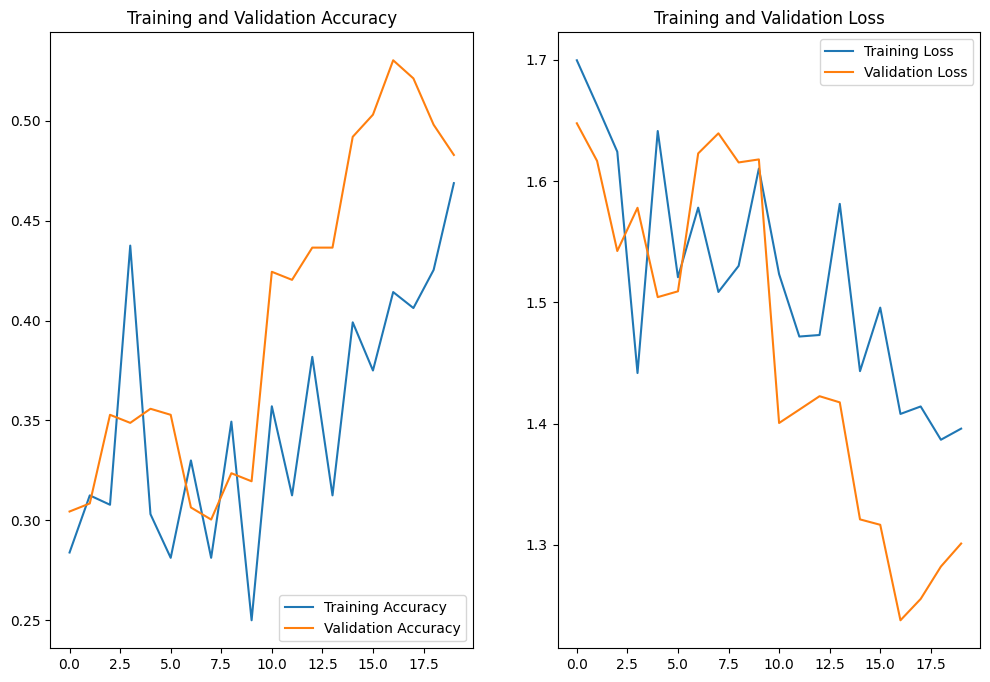

In [104]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()